Binary Search

In [5]:
array = [1,3,4,5,13,20,25,40,42,44,53]
x = 13
def number_to_find(array, x, left, right):
    if(left>right):
        return False
    mid = int((left + right)/2)
    if(array[mid] == x):
        return True
    elif(array[mid] > x):
        number_to_find(array,x,left,mid-1)
    elif(array[mid] < x):
        number_to_find(array,x,mid+1,right)

print(number_to_find(array,x,0,len(array)-1))

None


In [6]:
def number_to_find_iterative(array,x):
    left = 0
    right = len(array) - 1
    while left<=right:
        mid = int((left+right)/2)
        if array[mid] == x:
            return True
        elif array[mid] > x:
            right = mid -1
        elif array[mid] < x:
            left = mid + 1
    
    return False

%timeit number_to_find_iterative(array,13)

2.1 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
def sum1(n):
    final_sum = 0
    for i in range(n+1):
        final_sum+=i
    return final_sum

def sum2(n):
    return (n*(n+1))/2

In [8]:
%timeit sum1(100)
%timeit sum2(100)

6.55 µs ± 776 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
263 ns ± 44.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Text(0.5, 0, 'n')

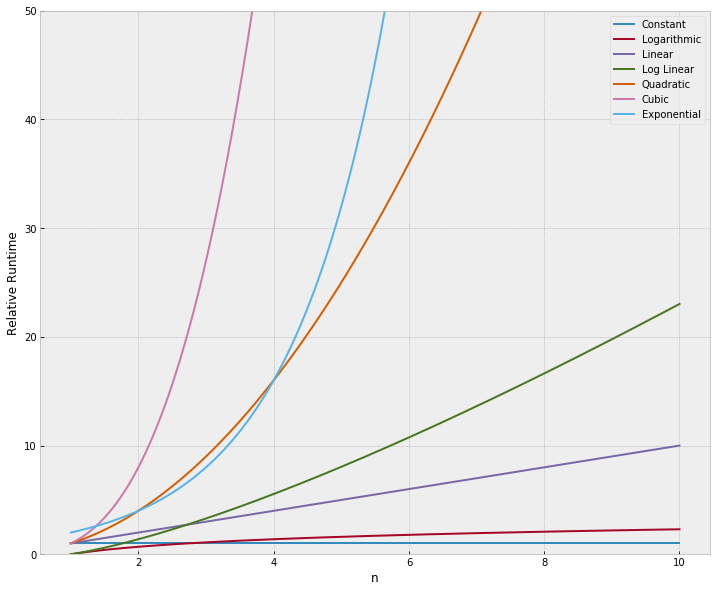

In [9]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

# Anagram Problem

Anagram is something which can be rephrased using the same letters in the parent string

In [10]:
def anagram(s1,s2):
    if sorted(s1.replace(' ','').lower()) == sorted(s2.replace(' ','').lower()):
        return True
    else: 
        return False
        

In [11]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class AnagramTest(object):
    
    def test(self,sol):
        assert_equal(sol('go go go','gggooo'),True)
        assert_equal(sol('abc','cba'),True)
        assert_equal(sol('hi man','hi     man'),True)
        assert_equal(sol('aabbcc','aabbc'),False)
        assert_equal(sol('123','1 2'),False)
        print('ALL TEST CASES PASSED')

# Run Tests
t = AnagramTest()
t.test(anagram)

ALL TEST CASES PASSED


In [12]:
anagram2('go go go','gggooo')

NameError: name 'anagram2' is not defined

In [13]:
def anagram2(s1,s2):
    
    # Remove spaces and lowercase letters
    s1 = s1.replace(' ','').lower()
    s2 = s2.replace(' ','').lower()
    
    # Edge Case to check if same number of letters
    if len(s1) != len(s2):
        return False
    
    # Create counting dictionary (Note could use DefaultDict from Collections module)
    count = {}
    
    
        
    # Fill dictionary for first string (add counts)
    for letter in s1:
        if letter in count:
            count[letter] += 1
        else:
            count[letter] = 1
            
    # Fill dictionary for second string (subtract counts)
    for letter in s2:
        if letter in count:
            count[letter] -= 1
        else:
            count[letter] = 1
    
    # Check that all counts are 0
    for k in count:
        if count[k] != 0:
            return False

    # Otherwise they're anagrams
    return True

In [14]:
t.test(anagram2)

ALL TEST CASES PASSED


# Array Sum Problem -- Icecream Problem

In [15]:
def pair_sum(arr,k):
    val_list = {}
    arr = sorted(arr)
    for i in arr:
        comp = k - i
        if comp in arr and comp not in val_list:
            val_list[i] = comp   
    return len(val_list) 

In [16]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestPair(object):
    
    def test(self,sol):
        assert_equal(sol([1,9,2,8,3,7,4,6,5,5,13,14,11,13,-1],10),6)
        assert_equal(sol([1,2,3,1],3),1)
        assert_equal(sol([1,3,2,2],4),2)
        #print('ALL TEST CASES PASSED')
        
#Run tests
t = TestPair()
%timeit t.test(pair_sum)
%timeit t.test(pair_sum1)

12.9 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


NameError: name 'pair_sum1' is not defined

In [17]:
def pair_sum1(arr,k):
    
    if len(arr)<2:
        return
    
    # Sets for tracking
    seen = set()
    output = set()
    
    # For every number in array
    for num in arr:
        
        # Set target difference
        target = k-num
        
        # Add it to set if target hasn't been seen
        if target not in seen:
            seen.add(num)
        
        else:
            # Add a tuple with the corresponding pair
            output.add( (min(num,target),  max(num,target)) )
    
    
    # FOR TESTING
    return len(output)
    # Nice one-liner for printing output
    #return '\n'.join(map(str,list(output)))

# Missing Number in the second Array

In [18]:
import collections

def finder2(arr1, arr2): 
    
    # Using default dict to avoid key errors
    d=collections.defaultdict(int) 
    
    # Add a count for every instance in Array 1
    for num in arr2:
        d[num]+=1 
    
    # Check if num not in dictionary
    for num in arr1: 
        print(d)
        if d[num]==0: 
            return num 
        
        # Otherwise, subtract a count
        else: d[num]-=1 
         
 
finder2([5,5,7,7],[5,7,7])

defaultdict(<class 'int'>, {5: 1, 7: 2})
defaultdict(<class 'int'>, {5: 0, 7: 2})


5

# Largest Continuous Sum in the given array

In [19]:
def large_cont_sum(arr): 
    if len(arr) == 0:
        return 0
    
    max_sum = current_sum = arr[0]
    
    for i in arr[1:]:
        current_sum = max(current_sum+i,i)
        max_sum = max(max_sum,current_sum)
    return max_sum

In [20]:
from nose.tools import assert_equal

class LargeContTest(object):
    def test(self,sol):
        assert_equal(sol([1,2,-1,3,4,-1]),9)
        assert_equal(sol([1,2,-1,3,4,10,10,-10,-1]),29)
        assert_equal(sol([-1,1]),1)
        print ('ALL TEST CASES PASSED')
        
#Run Test
t = LargeContTest()
t.test(large_cont_sum)

ALL TEST CASES PASSED


# Sentence Reversal

In [21]:
def rev_word(s):
#     s_return = ''
#     for i in s.split()[::-1]:
#         s_return+=i+' '
    """
    Manually doing the splits on the spaces.
    """
    
    words = []
    length = len(s)
    spaces = [' ']
    
    # Index Tracker
    i = 0
    
    # While index is less than length of string
    while i < length:
        
        # If element isn't a space
        if s[i] not in spaces:
            
            # The word starts at this index
            word_start = i
            
            while i < length and s[i] not in spaces:
                
                # Get index where word ends
                i += 1
            # Append that word to the list
            words.append(s[word_start:i])
        # Add to index
        i += 1
        
    # Join the reversed words
    return " ".join(reversed(words))


In [22]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""

from nose.tools import assert_equal

class ReversalTest(object):
    
    def test(self,sol):
        assert_equal(sol('    space before'),'before space')
        assert_equal(sol('space after     '),'after space')
        assert_equal(sol('   Hello John    how are you   '),'you are how John Hello')
        assert_equal(sol('1'),'1')
        print('ALL TEST CASES PASSED')
        
# Run and test
t = ReversalTest()
t.test(rev_word)

ALL TEST CASES PASSED


# String Compression

In [23]:
def compress(s):
    counter = {}
    strs = ''
    for i in s:
        if i not in counter:
            counter[i]=1
        else:
            counter[i]+=1
    for i,j in zip(counter.keys(),counter.values()):
        strs+=i+str(j)
    
    return strs

In [24]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestCompress(object):

    def test(self, sol):
        assert_equal(sol(''), '')
        assert_equal(sol('AABBCC'), 'A2B2C2')
        assert_equal(sol('AAABCCDDDDD'), 'A3B1C2D5')
        #print('ALL TEST CASES PASSED')

# Run Tests
t = TestCompress()
%timeit t.test(compress)
%timeit t.test(compress2)

14.5 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


NameError: name 'compress2' is not defined

In [25]:
def compress2(s):
    """
    This solution compresses without checking. Known as the RunLength Compression algorithm.
    """
    
    # Begin Run as empty string
    r = ""
    l = len(s)
    
    # Check for length 0
    if l == 0:
        return ""
    
    # Check for length 1
    if l == 1:
        return s + "1"
    
    #Intialize Values
    last = s[0]
    cnt = 1
    i = 1
    
    while i < l:
        
        # Check to see if it is the same letter
        if s[i] == s[i - 1]: 
            # Add a count if same as previous
            cnt += 1
        else:
            # Otherwise store the previous data
            r = r + s[i - 1] + str(cnt)
            cnt = 1
            
        # Add to index count to terminate while loop
        i += 1
    
    # Put everything back into run
    r = r + s[i - 1] + str(cnt)
    
    return r

# Unique Characters in String

In [26]:
def uni_char(s):
    chars = set()
    for let in s:
        # Check if in set
        if let in chars:
            return False
        else:
            #Add it to the set
            chars.add(let)
    return True

In [27]:
"""
RUN THIS CELL TO TEST YOUR CODE>
"""
from nose.tools import assert_equal


class TestUnique(object):

    def test(self, sol):
        assert_equal(sol(''), True)
        assert_equal(sol('goo'), False)
        assert_equal(sol('abcdefg'), True)
        print('ALL TEST CASES PASSED')
        
# Run Tests
t = TestUnique()
t.test(uni_char)

ALL TEST CASES PASSED


# Stack Implementation

In [28]:
class Stack:
    
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

# Queue Implementation

In [29]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)

# Deque Implementation

In [30]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

# Balanced Paranthesis

In [31]:
def balance_check(s):
    chars = []
    matches = {'}':'{',']':'[',')':'('}
    for c in s:
        if c in matches:
            if chars.pop() != matches[c]:
                return False
        else:
            chars.append(c)
    return chars == []

In [32]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestBalanceCheck(object):
    
    def test(self,sol):
        assert_equal(sol('[](){([[[]]])}('),False)
        assert_equal(sol('[{{{(())}}}]((()))'),True)
        assert_equal(sol('[[[]])]'),False)
        print ('ALL TEST CASES PASSED')
        
# Run Tests

t = TestBalanceCheck()
t.test(balance_check)

ALL TEST CASES PASSED


In [33]:
def balance_check(s):
    
    # Check is even number of brackets
    if len(s)%2 != 0:
        return False
    
    # Set of opening brackets
    opening = set('([{') 
    
    # Matching Pairs
    matches = set([ ('(',')'), ('[',']'), ('{','}') ]) 
    
    # Use a list as a "Stack"
    stack = []
    
    # Check every parenthesis in string
    for paren in s:
        
        # If its an opening, append it to list
        if paren in opening:
            stack.append(paren)
        
        else:
            
            # Check that there are parentheses in Stack
            if len(stack) == 0:
                return False
            
            # Check the last open parenthesis
            last_open = stack.pop()
            
            # Check if it has a closing match
            if (last_open,paren) not in matches:
                return False
            
    return len(stack) == 0

# Queue 2 Stacks

In [34]:
class Queue2Stacks(object):
    
    def __init__(self):
        self.instack = []
        self.outstack = []
     
    def enqueue(self,element):
        self.instack.append(element)
    
    def dequeue(self):
        if not self.outstack:
            while self.instack:
                self.outstack.append(self.instack.pop())
        return self.outstack.pop() 

In [35]:
q = Queue2Stacks()
for i in range(5):
    q.enqueue(i)

for i in range(5):
    print(q.dequeue())

0
1
2
3
4


# Single Linked List Implementation

In [36]:
#Adding new comments to check and learn git tutorial
class SingleLinkedList(object):
        
        def __init__(self,value):
            self.value = value
            self.next_node = None

In [37]:
a = SingleLinkedList(1)
b= SingleLinkedList(2)
c = SingleLinkedList(3)

In [38]:
a.next_node = b

In [39]:
a.next_node.value

2

# Doubly Linked List Implementation

In [40]:
class DoubleLinkedListNode(object):
    
    def __init__(self,value):
        self.value = value
        self.next_node = None
        self.prev_node = None

In [41]:
a = DoubleLinkedListNode(1)
b = DoubleLinkedListNode(2)
c = DoubleLinkedListNode(3)

In [42]:
a.next_node = b
b.prev_node = a
b.next_node = c
c.prev_node = b

In [43]:
a.value

1

In [44]:
a.next_node.value

2

In [45]:
i = a
while i.next_node != None:
    print(i.value)
    i = i.next_node
    
print(i.value)

1
2
3


# Single Linked list Cycle Check

In [46]:
def cycle_check(node):
    visited_nodes = []
    while node.next_node != None:
        visited_nodes.append(node)
        node = node.next_node
        if node in visited_nodes:
            return True
    return False

In [47]:
a = SingleLinkedList(1)
b = SingleLinkedList(2)
c = SingleLinkedList(3)
a.next_node = b
b.next_node = c
c.next_node = a

In [48]:
cycle_check(b)

True

In [49]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

# CREATE CYCLE LIST
a = SingleLinkedList(1)
b = SingleLinkedList(2)
c = SingleLinkedList(3)
a.next_node = b
b.next_node = c
c.next_node = a # Cycle Here!


# CREATE NON CYCLE LIST
x = SingleLinkedList(1)
y = SingleLinkedList(2)
z = SingleLinkedList(3)

x.next_node = y
y.next_node = z


#############
class TestCycleCheck(object):
    
    def test(self,sol):
        assert_equal(sol(a),True)
        assert_equal(sol(x),False)
        
        print("ALL TEST CASES PASSED")
        
# Run Tests

t = TestCycleCheck()
t.test(cycle_check)

ALL TEST CASES PASSED


# Reverse Single Linked List 

In [59]:
def reverse(head):
    
    current = head
    previous = None
    nextnode = None
    
    while current:
        
        nextnode = current.next_node 
        current.next_node = previous
        previous = current
        current = nextnode
    
    return previous

In [60]:
reverse(a)

In [67]:
a = SingleLinkedList(1)
b = SingleLinkedList(2)
c = SingleLinkedList(3)
d = SingleLinkedList(4)
e = SingleLinkedList(5)
a.next_node = b
b.next_node = c
c.next_node = d
d.next_node = e

In [61]:
a.next_node.value

AttributeError: 'NoneType' object has no attribute 'value'

In [62]:
b.next_node.value

1

In [63]:
c.next_node.value

2

In [64]:
d.next_node.value

3

In [66]:
d.value

4

# Nth to Last node 

Logic of the below code is if we want to find nth node from the last node in the linked list, create two pointer nodes both starting at the head node and move the first pointer node n positions forward and stop it, from that point as reference starting point move(loop) till the end of the linked list along with that move the position of the second pointer from the starting position sso that it will stop right before n positions from the end point, which will work for the code. Just as an edge case to find if n is larger than the size of linked list raise a Lookup error, Voila!

In [76]:
def nth_to_last_node(n, head):

    right_node = head
    left_node = head

    for i in range(n-1):
        if not right_node.next_node:
            raise LookupError('Error n: is a larger number than the size of the linked list')
        
        right_node = right_node.next_node

    while right_node.next_node:
        left_node = left_node.next_node
        right_node = right_node.next_node
    return left_node.value

In [75]:
nth_to_last_node(2,a)

4

# Recursion Exercises

In [80]:
def rec_sum(n):
    if n == 0:
        return 0
    else:
        return n + rec_sum(n-1)

In [81]:
rec_sum(4)

10

In [83]:
def rec_fact(n):
    if n == 0:
        return 1
    else:
        return n * rec_fact(n-1)

In [84]:
rec_fact(4)

24

In [87]:
def rec_sumn(n):
    if n < 10:
        return n
    else:
        return n%10 + rec_sumn(int(n/10))

In [88]:
rec_sumn(4321)

10

In [92]:
#Input Example for reference
# word_split('ilovedogsjohn',['i','am','a','dogs','lover','love','John'])
def word_split(phrase, list_of_words, output = None):
    if output is None:
        output = []
    
    for word in list_of_words:
        if str.lower(phrase).startswith(str.lower(word)):
            output.append(word)
            word_split(phrase[len(word):], list_of_words, output)
    return output


In [93]:
word_split('ilovedogsjohn',['i','am','a','dogs','lover','love','John'])

['i', 'love', 'dogs', 'John']

# Memoization 

Memoization is a process of creating a cache version for the recently called function/recursive fucntion result inorder to improve the perfomance. It ia also an optimization technique used primarily to speed up the computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

In [94]:
class Memoize:
    def __init__(self,f):
        self.f = f
        self.memo = {}
    def __call__(self, *args):
        if not args in self.memo:
            self.memo[args] = self.f(*args)
        return self.memo[args]



In [95]:
def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)

factorial = Memoize(factorial)

In [101]:
%timeit factorial(44)
%timeit rec_fact(44)

317 ns ± 13.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.93 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [102]:
factorial.memo

{(1,): 1,
 (2,): 2,
 (3,): 6,
 (4,): 24,
 (5,): 120,
 (6,): 720,
 (7,): 5040,
 (8,): 40320,
 (9,): 362880,
 (10,): 3628800,
 (11,): 39916800,
 (12,): 479001600,
 (13,): 6227020800,
 (14,): 87178291200,
 (15,): 1307674368000,
 (16,): 20922789888000,
 (17,): 355687428096000,
 (18,): 6402373705728000,
 (19,): 121645100408832000,
 (20,): 2432902008176640000,
 (21,): 51090942171709440000,
 (22,): 1124000727777607680000,
 (23,): 25852016738884976640000,
 (24,): 620448401733239439360000,
 (25,): 15511210043330985984000000,
 (26,): 403291461126605635584000000,
 (27,): 10888869450418352160768000000,
 (28,): 304888344611713860501504000000,
 (29,): 8841761993739701954543616000000,
 (30,): 265252859812191058636308480000000,
 (31,): 8222838654177922817725562880000000,
 (32,): 263130836933693530167218012160000000,
 (33,): 8683317618811886495518194401280000000,
 (34,): 295232799039604140847618609643520000000,
 (35,): 10333147966386144929666651337523200000000,
 (36,): 371993326789901217467999448150835

# String reverse using recursion

In [112]:
def reverse(s):
    if len(s) == 1:
        return s
    return s[len(s)-1:]+reverse(s[:len(s)-1])

In [113]:
reverse('hello world')

'dlrow olleh'

In [114]:
'''
RUN THIS CELL TO TEST YOUR FUNCTION AGAINST SOME TEST CASES
'''

from nose.tools import assert_equal

class TestReverse(object):
    
    def test_rev(self,solution):
        assert_equal(solution('hello'),'olleh')
        assert_equal(solution('hello world'),'dlrow olleh')
        assert_equal(solution('123456789'),'987654321')
        
        print('PASSED ALL TEST CASES!')
        
# Run Tests
test = TestReverse()
test.test_rev(reverse)

PASSED ALL TEST CASES!


# String permutations

In [115]:
def permute(s):

    output = []

    if len(s) == 1:
        return s
    
    for i, let in enumerate(s):

        for perm in permute(s[:i] + s[i+1:]):
            output += [let + perm]

    return output

In [116]:
permute('abc')

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

# Fibonacci Sequence in multiple ways Recursive, Dynamic Programming(Memoization), Iteratively

In [121]:
# recursive way 
def rec_fib(n):

    if n == 0 or n == 1:
        return n
    else:
        return rec_fib(n-1) + rec_fib(n-2)

In [122]:
rec_fib(10)

55

In [127]:
#Dynamic way
n = 10
cache = [None] * (n+1)

def dyn_fib(n):
    if n == 0 or n == 1:
        return n
    
    if cache[n] != None:
        return cache[n]
    
    cache[n] = dyn_fib(n-1) + dyn_fib(n-2)

    return cache[n]

In [128]:
dyn_fib(10)

55

In [133]:
# Iterative approach

def iter_fib(n):

    a = 0
    b = 1

    for i in range(n-1):
        a, b = b, a+b

    return b

In [135]:
iter_fib(23)

28657

# Coin Change Problem (Classic Problem implementing with Memoization)

In [146]:
#Test Input for code 
#target = 10
#coins = [1,5,10]
def rec_coin(target, coins):
    counters = []
    for i in coins:
        if i == target:
            counters.append(1)
        else:
            sum = 0
            count = -1
            while sum <= target:
                sum += i
                count+=1
            counters.append(count)
    return counters

In [153]:
rec_coin(10,[1,2,4,5])

2
3
2
2
3
2
2
2
3
2
3
2
2
2
3
2
3
2
2
3
2
2
2
2
2


2

In [163]:
def rec_coin(target, coins,known_results):
    
    min_coins = target
    if target in coins:
        known_results[target] = 1
        return 1
    elif known_results[target] > 0:
        return known_results[target]
    else:
        for i in [c for c in coins if c <= target]:
            num_coins = 1 + rec_coin(target - i, coins,known_results)

            if num_coins < min_coins:
                min_coins = num_coins
                known_results[target] = min_coins
    return min_coins

In [164]:
rec_coin(10,[1,2,4,5],[0]*(10+1))

2

# Coin Change Problem with Dynamic Programming Iterative Solution

In [177]:
def coin_change(target, coins):
    dp = [float('inf')]*(target+1)
    dp[0] = 0
    print(dp)
    for coin in coins:
        for x in range(coin,target+1):
            print('Inside x loop:',dp[x],'   ',dp[x-coin], '   ', x, '  ', coin)
            dp[x] = min(dp[x], dp[x-coin] + 1)
    return dp[target] if dp[target] != float('inf') else -1

In [178]:
coin_change(10,[1,2,4,5])

[0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Inside x loop: inf     0     1    1
Inside x loop: inf     1     2    1
Inside x loop: inf     2     3    1
Inside x loop: inf     3     4    1
Inside x loop: inf     4     5    1
Inside x loop: inf     5     6    1
Inside x loop: inf     6     7    1
Inside x loop: inf     7     8    1
Inside x loop: inf     8     9    1
Inside x loop: inf     9     10    1
Inside x loop: 2     0     2    2
Inside x loop: 3     1     3    2
Inside x loop: 4     1     4    2
Inside x loop: 5     2     5    2
Inside x loop: 6     2     6    2
Inside x loop: 7     3     7    2
Inside x loop: 8     3     8    2
Inside x loop: 9     4     9    2
Inside x loop: 10     4     10    2
Inside x loop: 2     0     4    4
Inside x loop: 3     1     5    4
Inside x loop: 3     1     6    4
Inside x loop: 4     2     7    4
Inside x loop: 4     1     8    4
Inside x loop: 5     2     9    4
Inside x loop: 5     2     10    4
Inside x loop: 2     0     5    5
Insi

2

In [179]:
# Credits to Leetcode.com for Algorithm and it's explanation 
from IPython.display import Image
Image(url='https://leetcode.com/media/original_images/322_coin_change_table.png')

# Tree 

# Tree Implementation - List of Lists

In [180]:
def BinaryTree(r):
    return [r,[],[]]

def getRootVal(root):
    return root[0]

def setRootVal(root, newVal):
    root[0] = newVal

def getLeftChild():
    return root[1]

def getRightChild():
    return root[2]

def insertLeft(root, newBranch):
    t = root.pop(1)

    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch,[],[]])
    
    return root

def insertRight(root,newBranch):

    t = root.pop(2)

    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    
    return root


In [183]:
r = BinaryTree(3)
insertLeft(r,4)
insertLeft(r,5)
insertRight(r,6)
insertRight(r,7)

[3, [5, [], [4, [], []]], [7, [6, [], []], []]]